## Bank Term Deposit Prediction Using SVM

In [15]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
#Loading data
bank = pd.read_csv("bank-full.csv",sep=';')

In [17]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
bank.shape

(45211, 17)

### Data Pre-processing

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
#Statistical Analysis
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataset

In [22]:
#Checking for duplicates
bank.duplicated().sum()

np.int64(0)

In [23]:
#Investigating these 12 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


These relate to different campaigns hence not duplicates

### Exploratory Data Analysis

Analyzing feature: job


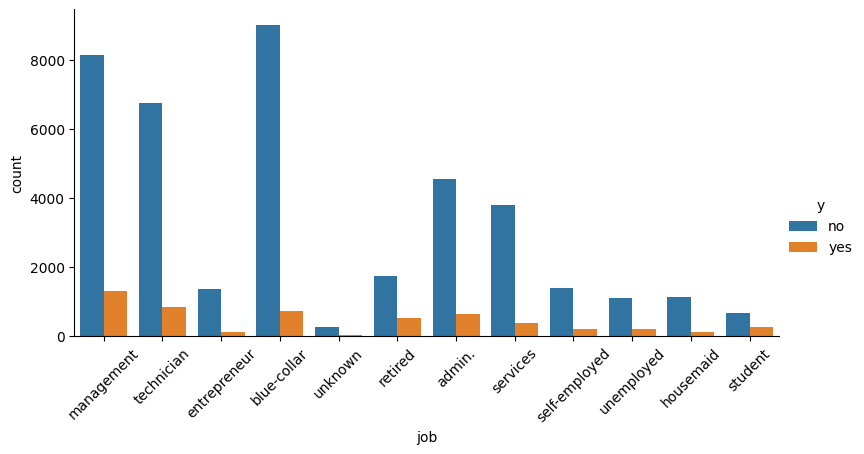

Analyzing feature: marital


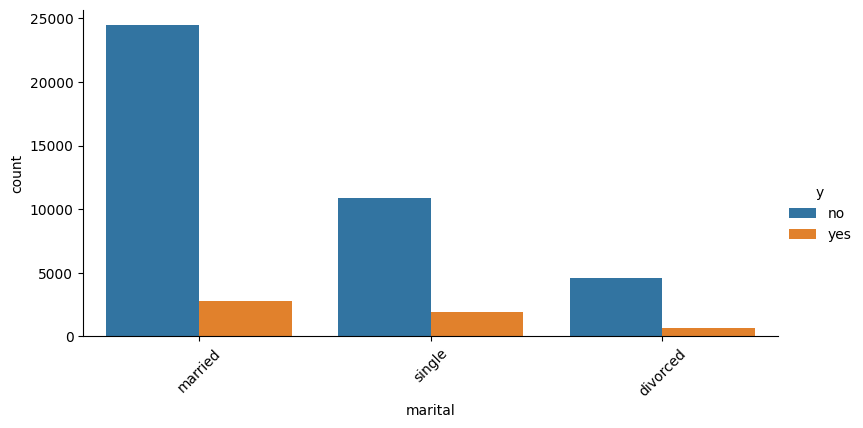

Analyzing feature: education


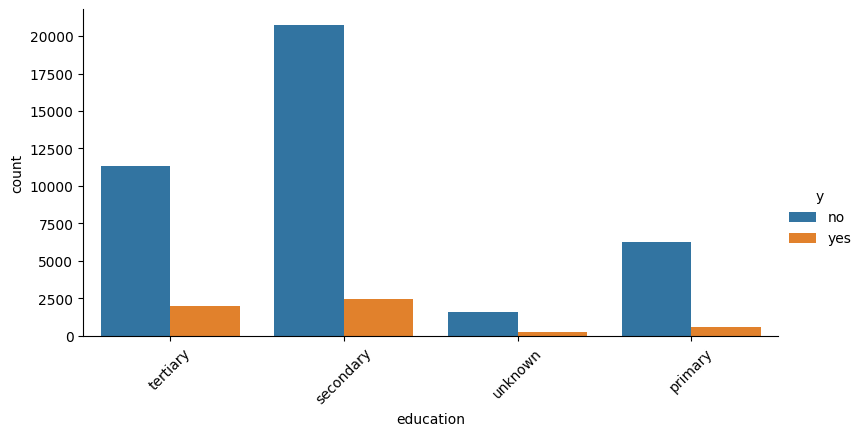

Analyzing feature: default


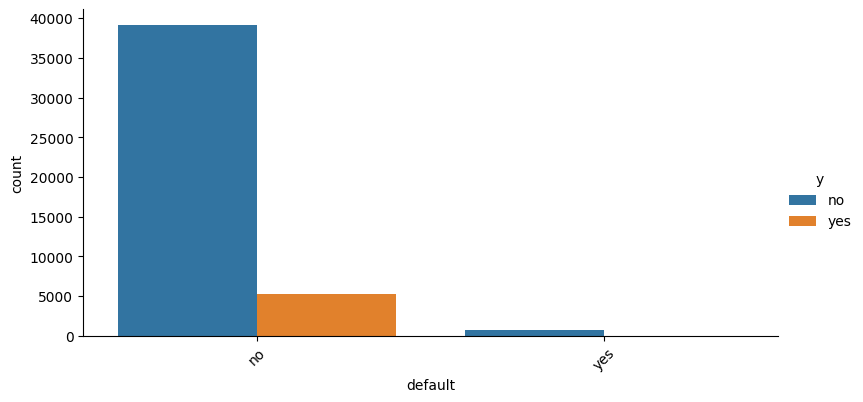

Analyzing feature: housing


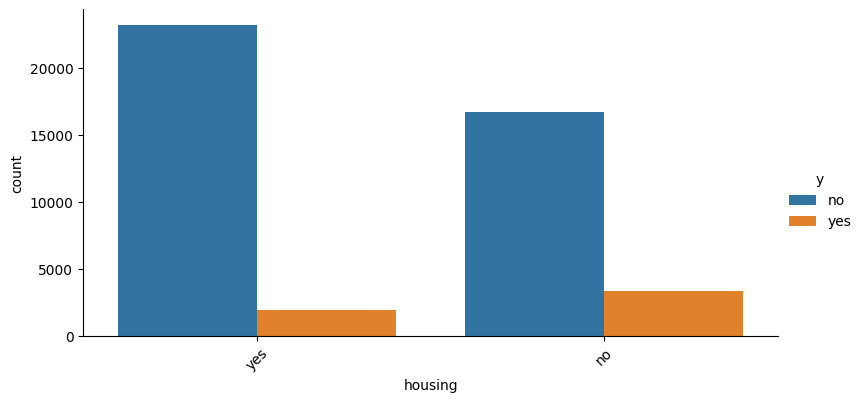

Analyzing feature: loan


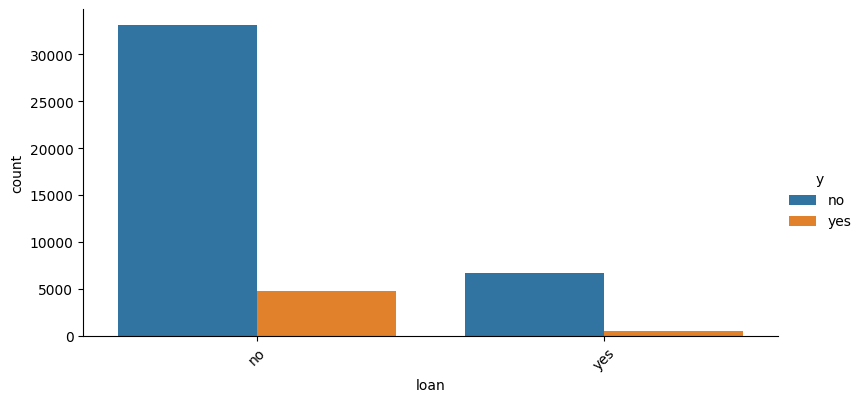

Analyzing feature: contact


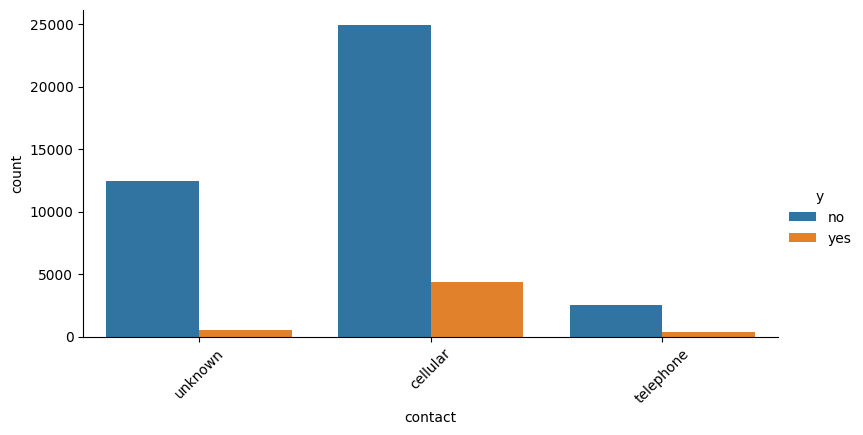

Analyzing feature: month


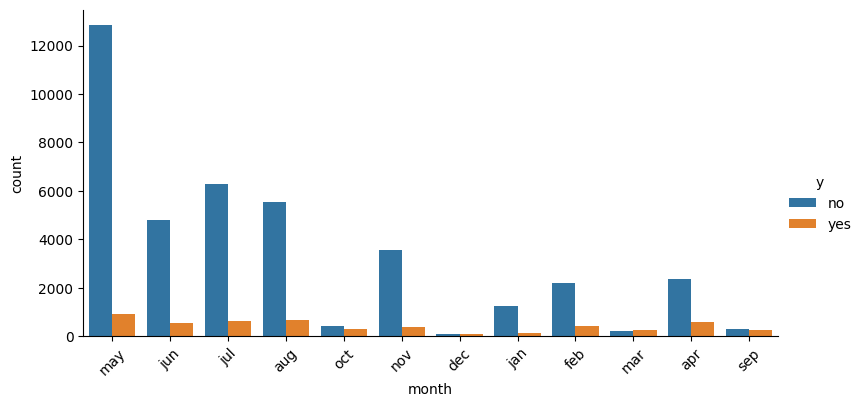

Analyzing feature: poutcome


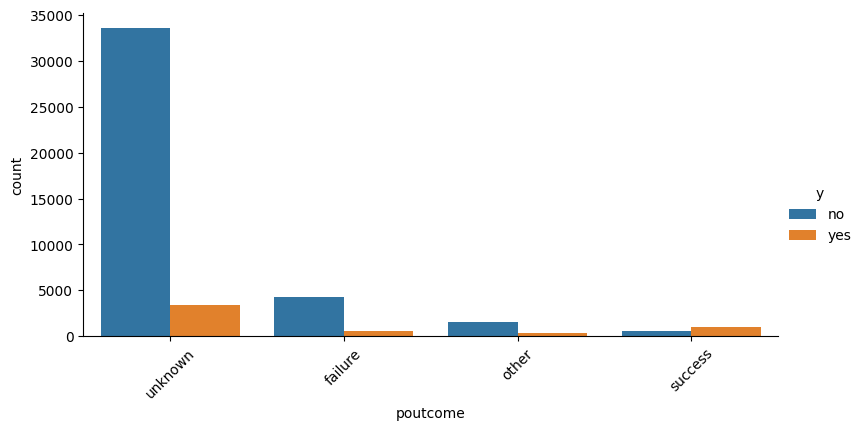

In [24]:
# Define the target column
target_column = 'y'  # Replace 'y' with your target column name

# Find categorical features
categorical_features = bank.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove(target_column)

# Plot the relationship between each categorical feature and the target variable
for feature in categorical_features:
    print(f"Analyzing feature: {feature}")
    sns.catplot(data=bank, x=feature, hue=target_column, kind="count", height=4, aspect=2)
    plt.xticks(rotation=45)
    plt.show()


### Label Encoding Categorical Features

In [25]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [26]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [27]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0


In [34]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [39]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()
ypred = decision_tree.predict(test_X)

#### Hyperparameter tunning

In [40]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [41]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [42]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}

In [43]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20)

In [44]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

np.float64(0.9001167024481953)

In [45]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [46]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.904319524757481
Test Score: 0.8982601002654085


In [47]:
pred_y = clf.predict(test_X)

In [48]:
from sklearn.svm import SVC
# Step 7: Train the SVM model
print("\nTraining the SVM model...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(train_X, train_y)
print("Model training completed.")


Training the SVM model...
Model training completed.


In [49]:
# Make predictions on the test set
y_pred = svm_model.predict(test_X)
print("\nSVM Training Complete!")


SVM Training Complete!


In [50]:
# Classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

# Accuracy score
accuracy = accuracy_score(test_y, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11948
           1       0.66      0.25      0.37      1616

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.87     13564


Accuracy Score: 0.90


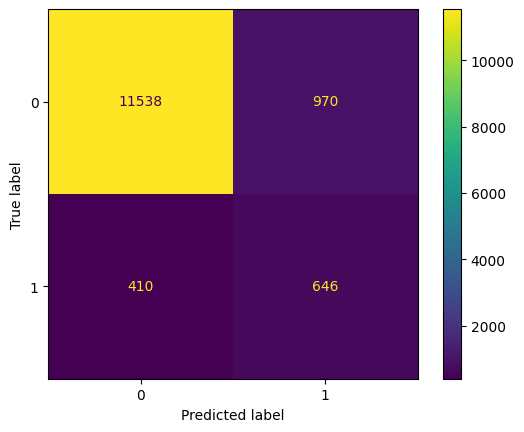

In [53]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()